In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.random.seed(0)

_1_to_3less = np.random.randint(1, 3, size=(7, 5))
_1_to_3less

array([[1, 2, 2, 1, 2],
       [2, 2, 2, 2, 2],
       [2, 1, 1, 2, 1],
       [1, 1, 1, 1, 2],
       [1, 2, 2, 1, 1],
       [2, 2, 2, 2, 1],
       [2, 1, 2, 1, 2]])

In [3]:
_1_to_3 = np.random.random_integers(1, 3, size=(7, 5))
_1_to_3

array([[2, 3, 1, 3, 1],
       [2, 2, 3, 1, 2],
       [2, 2, 1, 3, 1],
       [3, 3, 1, 3, 1],
       [1, 1, 2, 2, 3],
       [1, 1, 2, 1, 2],
       [3, 3, 1, 2, 2]])

In [4]:
df = pd.DataFrame(_1_to_3, columns=list("abcde"))
df

,a,b,c,d,e
0,2,3,1,3,1
1,2,2,3,1,2
2,2,2,1,3,1
3,3,3,1,3,1
4,1,1,2,2,3
5,1,1,2,1,2
6,3,3,1,2,2


In [5]:
print(df.to_string(index=False, header=False), end="")

 2  3  1  3  1
 2  2  3  1  2
 2  2  1  3  1
 3  3  1  3  1
 1  1  2  2  3
 1  1  2  1  2
 3  3  1  2  2

In [6]:
import io

strio = io.StringIO()
_str = df.to_string(buf=strio)

print(_str)
print(strio.getvalue())

None
   a  b  c  d  e
0  2  3  1  3  1
1  2  2  3  1  2
2  2  2  1  3  1
3  3  3  1  3  1
4  1  1  2  2  3
5  1  1  2  1  2
6  3  3  1  2  2


In [39]:
strio = io.StringIO()
df.to_string(buf=strio)
for l in strio:
    print(l)


In [40]:
strio = io.StringIO(df.to_string())
for l in strio:
    print(l)

   a  b  c  d  e

0  2  3  1  3  1

1  2  2  3  1  2

2  2  2  1  3  1

3  3  3  1  3  1

4  1  1  2  2  3

5  1  1  2  1  2

6  3  3  1  2  2


In [72]:
import zipfile
from contextlib import ExitStack

with ExitStack() as s:
    _bio = s.enter_context(io.BytesIO())
    z = s.enter_context(zipfile.ZipFile(_bio, "w", compression=zipfile.ZIP_DEFLATED))
    z.writestr("a.txt", "aaaa")
    z.writestr("c/d.txt", "ccdd")
    print(_bio.getvalue()[:4])


b'PK\x03\x04'


In [65]:
import zipfile

_zio = io.StringIO()
with zipfile.ZipFile(_zio, "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.writestr("a.txt", "aaaa")
    # z.writestr("a.txt", bytes("aaaa"))
    # z.writestr("b.txt", "bbb".encode())
    # z.writestr("c/d.txt", "ccdd")

_zio.getvalue()[:4]

TypeError: string argument expected, got 'bytes'

In [48]:
import zipfile

with zipfile.ZipFile("file.zip", "w", zipfile.ZIP_DEFLATED) as z:
    z.writestr("file.txt", df.to_string())


In [42]:
import os
now = pd.to_datetime("now").date().isoformat()
df.to_csv(now, index=False, header=False)
with open(now) as f:
    print(f.read())
os.remove(now)

2,3,1,3,1
2,2,3,1,2
2,2,1,3,1
3,3,1,3,1
1,1,2,2,3
1,1,2,1,2
3,3,1,2,2



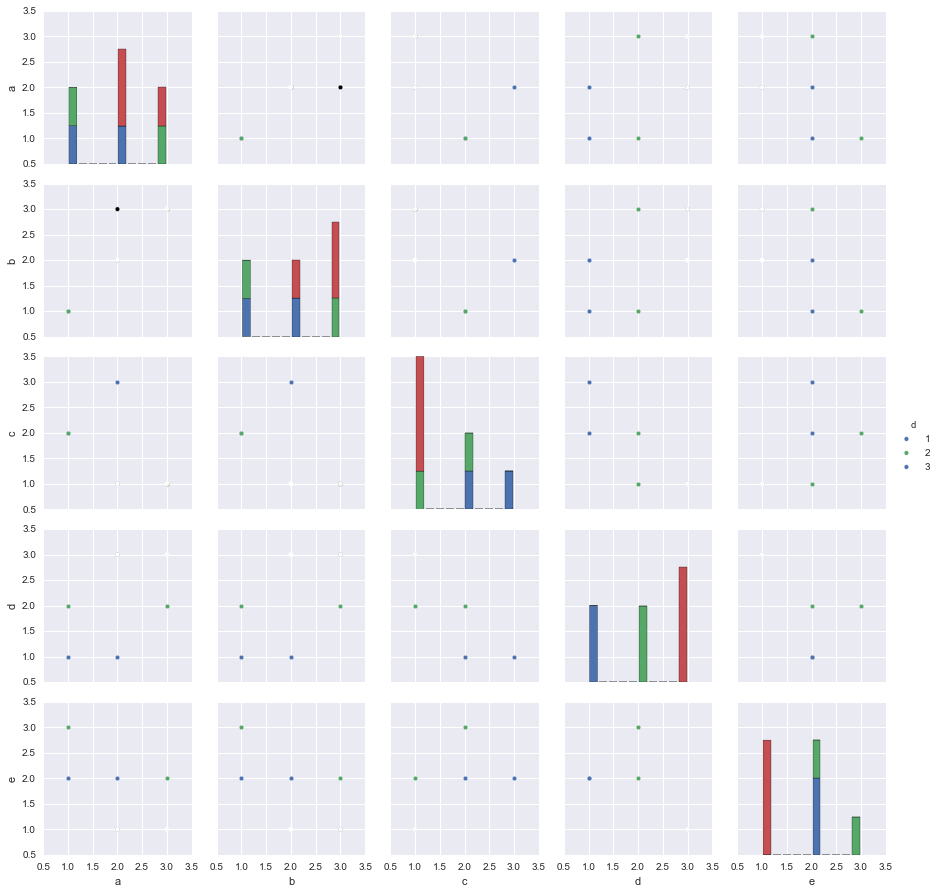

In [43]:
sns.pairplot(data=df, hue="d")